<a href="https://colab.research.google.com/github/madhu-80019/2420080019_ML/blob/main/ML_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
def load_dataset(dataset_name='iris'):
    if dataset_name.lower() == 'iris':
        data = load_iris()
        print("Loaded Iris Dataset")
    elif dataset_name.lower() == 'wine':
        data = load_wine()
        print("Loaded Wine Dataset")
    else:
        raise ValueError("Dataset must be 'iris' or 'wine'")

    X = data.data
    y = data.target
    feature_names = data.feature_names
    target_names = data.target_names

    print(f"Dataset shape: {X.shape}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Number of classes: {len(target_names)}")
    print("-" * 50)

    return X, y, feature_names, target_names


In [3]:
def preprocess_data(X):
    standard_scaler = StandardScaler()
    X_standardized = standard_scaler.fit_transform(X)

    minmax_scaler = MinMaxScaler()
    X_normalized = minmax_scaler.fit_transform(X)

    print("Preprocessing Completed")
    print(f"Standardized data mean: {X_standardized.mean():.2f}")
    print(f"Standardized data std: {X_standardized.std():.2f}")
    print(f"Normalized data range: [{X_normalized.min():.2f}, {X_normalized.max():.2f}]")
    print("-" * 50)

    return X_standardized, X_normalized



In [4]:
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    print("PCA Results:")
    for i in range(n_components):
        print(f"PC{i+1} Explained Variance: {explained_variance_ratio[i]*100:.2f}%")

    print(f"Total Variance Explained: {cumulative_variance[-1]*100:.2f}%")
    print("-" * 50)

    return X_pca, explained_variance_ratio, cumulative_variance

In [5]:
def plot_pca_2d(X_pca, y, target_names):
    plt.figure(figsize=(8, 6))
    for i, label in enumerate(target_names):
        plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=label)

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA 2D Visualization")
    plt.legend()
    plt.grid(True)
    plt.show()


In [6]:
def plot_scree(explained_variance_ratio, cumulative_variance):
    components = np.arange(1, len(explained_variance_ratio) + 1)

    plt.figure(figsize=(8, 5))
    plt.bar(components, explained_variance_ratio, alpha=0.6, label='Individual Variance')
    plt.plot(components, cumulative_variance, marker='o', label='Cumulative Variance')
    plt.xlabel("Principal Components")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Scree Plot")
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:
def compare_original_vs_pca(X, X_pca, y, feature_names):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("Original Data")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Transformed Data")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


Loaded Iris Dataset
Dataset shape: (150, 4)
Number of features: 4
Number of classes: 3
--------------------------------------------------
Preprocessing Completed
Standardized data mean: -0.00
Standardized data std: 1.00
Normalized data range: [0.00, 1.00]
--------------------------------------------------
PCA Results:
PC1 Explained Variance: 72.96%
PC2 Explained Variance: 22.85%
Total Variance Explained: 95.81%
--------------------------------------------------


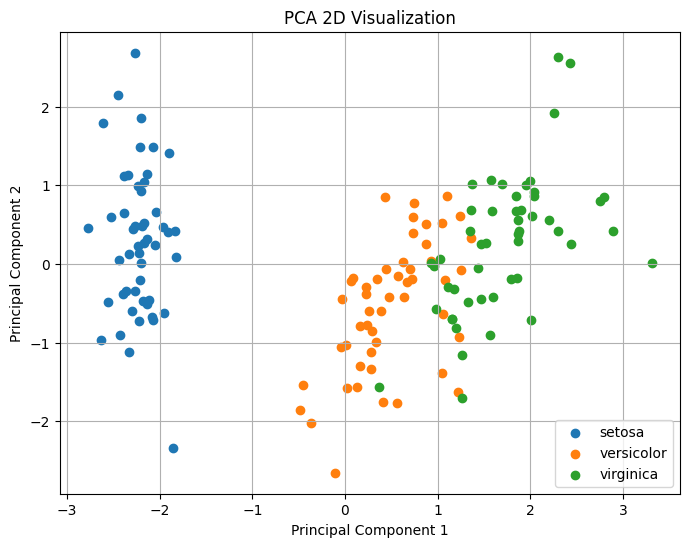

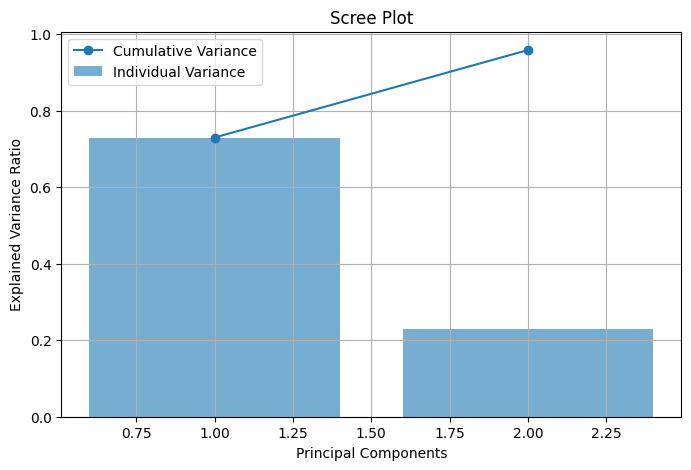

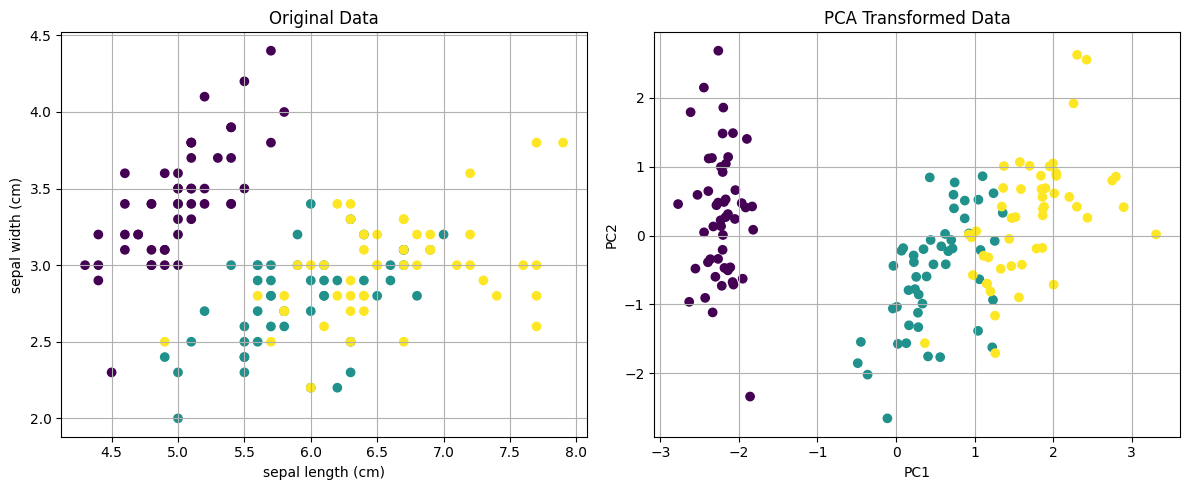

In [8]:
def main():
    X, y, feature_names, target_names = load_dataset('iris')

    X_standardized, X_normalized = preprocess_data(X)

    X_pca, evr, cum_var = apply_pca(X_standardized, n_components=2)

    plot_pca_2d(X_pca, y, target_names)
    plot_scree(evr, cum_var)
    compare_original_vs_pca(X, X_pca, y, feature_names)

if __name__ == "__main__":
    main()
